# Step 1: Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 2: Load dataset

In [3]:
df = pd.read_csv("drugs_side_effects_drugs_com.csv")

# Step 3: Data Cleaning

In [4]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [5]:
# Keep only rows with essential values
df_clean = df.dropna(subset=['drug_name', 'medical_condition', 'rating'])

In [6]:
# Fill missing side effects
df_clean['side_effects'] = df_clean['side_effects'].fillna('Unknown')

# Step 4: Basic Exploration

In [7]:
print("\nDataset shape after cleaning:", df_clean.shape)
print("\nSummary statistics:\n", df_clean.describe())


Dataset shape after cleaning: (1586, 17)

Summary statistics:
             rating  no_of_reviews
count  1586.000000    1586.000000
mean      6.812926      75.064943
std       2.313044     184.900847
min       0.000000       1.000000
25%       5.600000       2.000000
50%       7.000000      12.000000
75%       8.500000      58.000000
max      10.000000    2934.000000


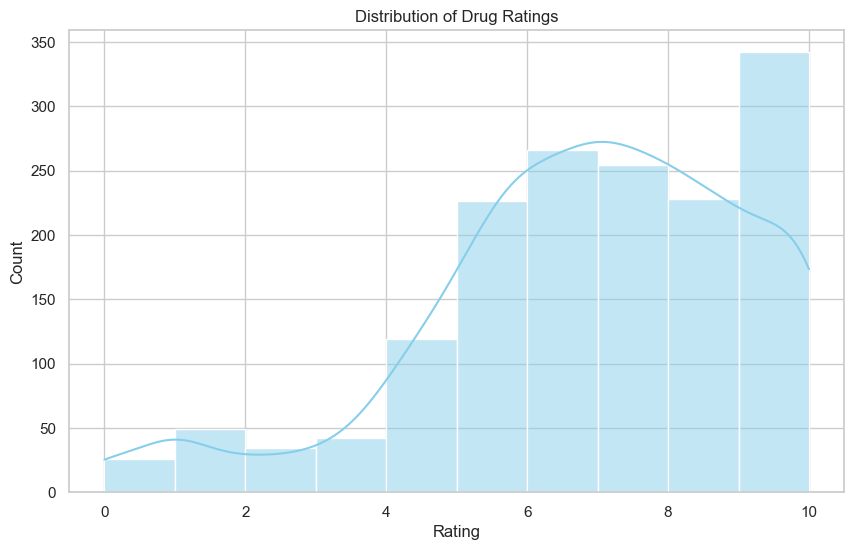

In [8]:
# Rating distribution
plt.figure()
sns.histplot(df_clean['rating'], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Step 5: Analyzing Relationships

In [9]:
# 5.1 Top Drugs by Condition
top_drugs = df_clean.groupby('medical_condition')['drug_name'].value_counts().groupby(level=0).head(5)
print("\nTop 5 drugs for each condition:\n", top_drugs)


Top 5 drugs for each condition:
 medical_condition  drug_name     
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                                    ..
Weight Loss        Adipex-P          1
                   Alli              1
                   Bontril PDM       1
                   Contrave          1
                   Lomaira           1
Name: count, Length: 224, dtype: int64


In [10]:
# 5.2 Side Effects
common_side_effects = df_clean['side_effects'].value_counts().head(10)
print("\nMost common side effects:\n", common_side_effects)


Most common side effects:
 side_effects
Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [16]:
# Calculate frequency of side effects as percentages
side_effect_counts = df_clean['side_effects'].value_counts()
side_effect_percent = (side_effect_counts / len(df_clean)) * 100

# Take top 10
top_side_effects = side_effect_percent.head(10)

# Display nicely
print("\nTop 10 reported side effects (as percentage of total):\n")
for effect, pct in top_side_effects.items():
    print(f"{effect[:80]}... : {pct:.2f}%")  # truncate long text for readability



Top 10 reported side effects (as percentage of total):

Unknown... : 1.51%
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Com... : 0.32%
redness, warmth, swelling, itching, stinging, burning, or irritation of treated ... : 0.19%
hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Le... : 0.19%
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Thi... : 0.19%
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Sto... : 0.13%
hives ; feeling light-headed; wheezing, difficult breathing; swelling of your fa... : 0.13%
hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. In... : 0.13%
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Thi... : 0.13%
hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Wa... : 0.13%


In [13]:
# 5.3 Ratings by Drug Class
if 'drug_classes' in df_clean.columns:
    class_ratings = df_clean.groupby('drug_classes')['rating'].mean().sort_values(ascending=False)
    print("\nAverage Rating by Drug Class:\n", class_ratings.head(10))    


Average Rating by Drug Class:
 drug_classes
Antibiotics / antineoplastics                        10.0
Amylin analogs                                       10.0
Estrogens                                            10.0
Barbiturates                                         10.0
Topical acne agents, Topical antibiotics             10.0
Thioxanthenes                                        10.0
Platelet aggregation inhibitors, Salicylates         10.0
Oxazolidinone antibiotics                            10.0
Mitotic inhibitors                                   10.0
Inhaled anti-infectives, Neuraminidase inhibitors    10.0
Name: rating, dtype: float64


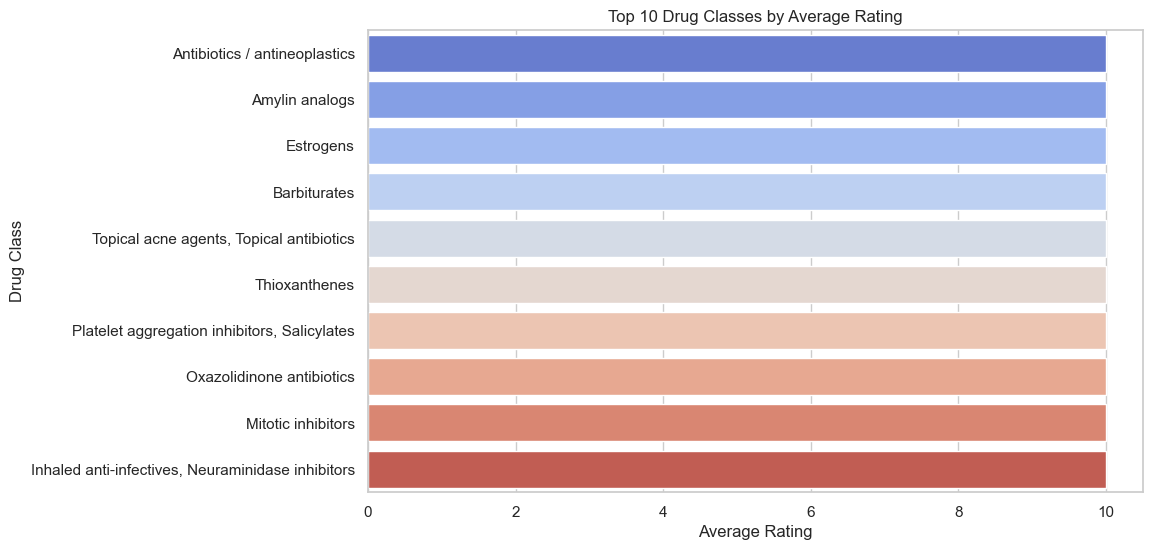

In [14]:
plt.figure()
sns.barplot(x=class_ratings.values[:10], y=class_ratings.index[:10], palette="coolwarm")
plt.title("Top 10 Drug Classes by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Drug Class")
plt.show()

# Conclusion
## 1. Drug ratings mostly range between 5.6 and 8.5, with a median rating of 7.0.
## 2. Most reviewed conditions:
##   - Hypertension – top drugs: lisinopril, hydrochlorothiazide / telmisartan, aliskiren / hydrochlorothiazide
##   - Acne – top drugs: minocycline, doxycycline, Sotret
##   - Pain – top drugs: oxycodone, bupivacaine liposome, benzocaine
## 3. Most frequent side effects:
##   - Unknown (not always reported)
##   - “hives; difficult breathing; swelling of your face, lips, tongue, or throat. Common side effects may include temporary hair loss (especially in children)”
##   - “hives; difficulty breathing; swelling of your face, lips, tongue, or throat. Less serious side effects may occur, and you may have none at all”
## 4. Drug classes with highest average ratings:
##   - Platelet aggregation inhibitors, Salicylates
##   - Oxazolidinone antibiotics
##   - Amylin analogs

## This analysis highlights patterns linking drug classes, conditions, side effects, and patient ratings.